<a href="https://colab.research.google.com/github/kaindoh/Titanic-project/blob/master/spam_or_not_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

The dataset of emails which i am to predict whether it is a spam or not spam

# Problem Statement

1.   To perfom GausianNB classification.
2.   To use various splits like 80 - 20,70 - 30 and 60 - 40 etc
3.   To Optimize the GausianNB clasifier so that it can reach its best perfomance


# Metrics of Success

*   Accuracy
*   ConfusionMatrix



# Importing Libaries

In [0]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid",context='notebook')
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.naive_bayes import GaussianNB
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading datase
df = pd.read_csv("spambase.data")
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


# Explorative data analysis

In [5]:
# Previewing the information of the dataset
#
print("Dataset info")
print("********************")
print(df.info())

Dataset info
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
0         4600 non-null float64
0.64      4600 non-null float64
0.64.1    4600 non-null float64
0.1       4600 non-null float64
0.32      4600 non-null float64
0.2       4600 non-null float64
0.3       4600 non-null float64
0.4       4600 non-null float64
0.5       4600 non-null float64
0.6       4600 non-null float64
0.7       4600 non-null float64
0.64.2    4600 non-null float64
0.8       4600 non-null float64
0.9       4600 non-null float64
0.10      4600 non-null float64
0.32.1    4600 non-null float64
0.11      4600 non-null float64
1.29      4600 non-null float64
1.93      4600 non-null float64
0.12      4600 non-null float64
0.96      4600 non-null float64
0.13      4600 non-null float64
0.14      4600 non-null float64
0.15      4600 non-null float64
0.16      4600 non-null float64
0.17      4600 non-null float64
0.18      4600 non-null flo

This indicates that there are no null values beacause every column has 4600

The data types are all floats and integers

In [6]:
# Getting the names of the columns
df.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

All the names are integers in form of strings

In [7]:
# Getting unique values for the dataset
columns = df.columns
for i in columns:
  print(i)
  print(df[i].unique())
  print("******************")
  print("\n")

0
[0.21 0.06 0.   0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]
******************


0.64
[2.800e-01 0.000e+00 1.200e-01 6.900e-01 4.200e-01 6.300e-01 7.000e-02
 6.800e-01 4.800e-01 4.100e-01 4.500e-01 3.000e-01 4.600e-01 1.920e+00
 3.600e-01 1.260e+00 5.900e-01 3.400e-01 2.400e-01 5.300e-01 4.400e-01
 9.400e-01 1.800e-01 7.200e-01 7.900e

There are no anomalies

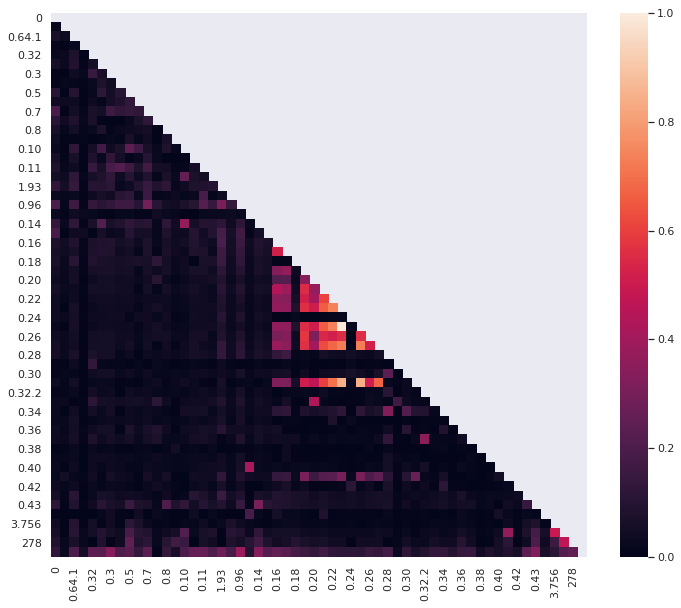

In [8]:
# Checking for correlation
corr  =df.corr().abs()

plt.figure(figsize = (12,10))
heatmap = np.zeros_like(df.corr().abs(), dtype=np.bool)
heatmap[np.triu_indices_from(heatmap)] = True
sns.heatmap(df.corr().abs(),mask=heatmap)
plt.show()

column 0.24 and 0.22 are highly correlated due to the light color

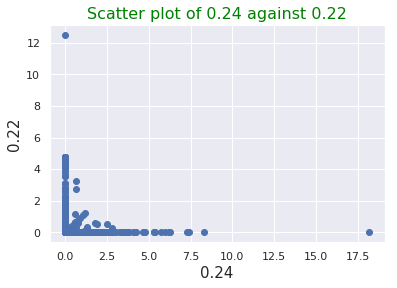

In [9]:
# Checking '0.24'  and '0.22' on a scatter plot
plt.scatter(df['0.24'],df['0.22'])
plt.xlabel("0.24",fontsize=15)
plt.ylabel("0.22",fontsize=15)
plt.title("Scatter plot of 0.24 against 0.22",fontsize=16,color="green")
plt.show()

There is a pattern but its not linear

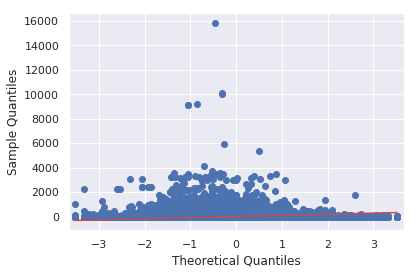

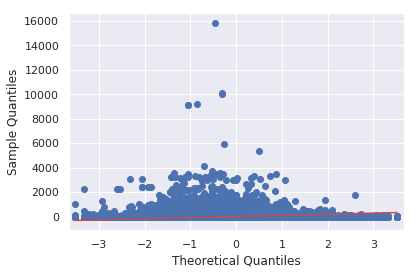

In [15]:
# Checking normality using qqplot
qqplot(df,line='s')


it does not show signs of normality

In [16]:
# Checking for normality using shapiro to confirm using values
shapiro(df)

(0.036625802516937256, 0.0)

if we assume alpha of 0.05 ,
0.0 < 0.05
hence we fail to reject the null hypothesis jence the data is not normal

# Data Cleaning

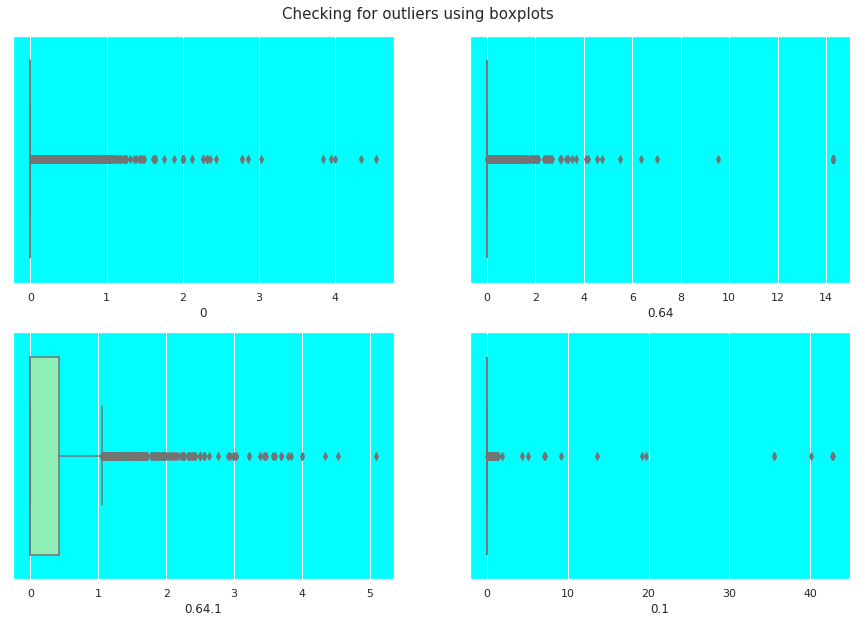

In [7]:
# Checking for outliers of the first four columns and there is evidence of outliers
numerical = df
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92)
for ax, data, column in zip(axes.flatten(), df, numerical):
  sns.boxplot(df[column], ax = ax,palette = 'rainbow')
  ax.set_facecolor('cyan')

The outliers are too many hence there should be reason why they exist

In [9]:
# Checking for duplicates
df.duplicated().any()

True

This shows presence of duplicates

In [10]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)
# Checking whether duplicates have been dropped
df.duplicated().any()

False

In [19]:
# checking for multicollinearity
correlation = df.corr()
df1 = pd.DataFrame(np.linalg.inv(correlation),index =correlation.index,columns=correlation.columns)
pd.Series(np.diag(df1), index=[df1.index, df1.columns]).sort_values(ascending=False)

0.23    0.23      102.289490
0.25    0.25       99.425255
0.31    0.31        3.436986
0.27    0.27        2.312860
61      61          2.267062
1       1           2.259203
0.22    0.22        2.242449
0.21    0.21        2.097397
0.19    0.19        1.849491
0.20    0.20        1.815912
0.26    0.26        1.668396
0.16    0.16        1.573232
0.41    0.41        1.567727
0.17    0.17        1.500553
3.756   3.756       1.477924
0.33    0.33        1.477796
278     278         1.475464
0.14    0.14        1.363122
0.96    0.96        1.361977
0.10    0.10        1.345852
0.13    0.13        1.328090
1.93    1.93        1.292740
0.43    0.43        1.281612
0.28    0.28        1.260782
0.40    0.40        1.258426
0.34    0.34        1.219328
0.11    0.11        1.209508
0.5     0.5         1.197592
0.3     0.3         1.196452
1.29    1.29        1.193662
0.7     0.7         1.188796
0.37    0.37        1.160100
0.32    0.32        1.139513
0.32.1  0.32.1      1.127416
0.32.2  0.32.2

We can see extreme cases of :
0.23    :      102.289490

0.25    :       99.425255

hence we can delete one column and see how it behaves

In [0]:
# Dropping 0.23 column
df.drop('0.23',inplace=True,axis=1)

In [22]:
# Testing multicollinearity again after dropping column '0.23'

correlation = df.corr()
df2 = pd.DataFrame(np.linalg.inv(correlation),index =correlation.index,columns=correlation.columns)
pd.Series(np.diag(df2), index=[df2.index, df2.columns]).sort_values(ascending=False)[:5]

0.25  0.25    4.326246
0.31  0.31    3.399635
0.27  0.27    2.309029
61    61      2.267060
1     1       2.259203
dtype: float64

We can see that column '0.25' has dropped from 99.42 to 4.32 whic is quite a huge decrease which is commendable

# Modelling

## GaussianNB Classification

In [0]:
# SPlitting the dataset into feature set and target set
X = df.drop('1',axis=1)
y = df['1']

**Partition 80 -20 on a normal data**

In [21]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Applying standard scaler with mean True  and with standard deviation true to make normal
sc = StandardScaler(with_mean=True,with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying GausianNB for classification
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.8293478260869566


array([[391, 147],
       [ 10, 372]])

partion 80 -20 has the highest accuracy of 82%

**Partition 70 -30 on a normal data**

In [22]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Applying standard scaler with mean True  and with standard deviation true to make normal
sc = StandardScaler(with_mean=True,with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying GausianNB for classification
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.8173913043478261


array([[585, 237],
       [ 15, 543]])

Partion 70 -30 has decreased with a small margin

**Partition 60 -40 on a normal data**

In [23]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

# Applying standard scaler with mean True  and with standard deviation true to make normal
sc = StandardScaler(with_mean=True,with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying GausianNB for classification
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.8043478260869565


array([[762, 335],
       [ 25, 718]])

Partion 60 -40 has decreased with a small margin

**Note** :*The most optimal one is 80 -20*

## Optimization of GausianNB

In [24]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Applying standard scaler with mean True  and with standard deviation true to make normal
sc = StandardScaler(with_mean=True,with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Applying GausianNB for classification
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.9032608695652173


array([[513,  25],
       [ 64, 318]])

After applying a reduction technique called it increased commendably upto 90 %

# Challenging the solution

**Gradient Boosting**

In [27]:

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Applying standard scaler with mean True  and with standard deviation true to make normal
sc = StandardScaler(with_mean=True,with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Applying GausianNB for classification
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.9119565217391304


array([[499,  39],
       [ 42, 340]])

GradientBoosting has increased upto 91.18% compared to GausianNB which has 90.32%

**RandomForest**

In [28]:

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Applying standard scaler with mean True  and with standard deviation true to make normal
sc = StandardScaler(with_mean=True,with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Applying GausianNB for classification
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.8728260869565218


array([[483,  55],
       [ 62, 320]])

RandomForest has decresed to 87.28% compared to GAusianNB which has 90.3%

**Xgboost**

In [25]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Applying standard scaler with mean True  and with standard deviation true to make normal
sc = StandardScaler(with_mean=True,with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Applying GausianNB for classification
clf = XGBClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.9152173913043479


array([[498,  40],
       [ 38, 344]])

Xgboost has inncreased even higher compared to GausianNb and GradientBoosting